In [2]:
import cv2                               
import numpy as np                      
import matplotlib.pyplot as plt         
import pyrealsense2 as rs            
import os


In [296]:
def show(img, mode = 'cv2'):
    if mode == 'cv2':
        cv2.imshow('test', img[...,::-1]); cv2.waitKey(0); cv2.destroyAllWindows()
    elif mode == 'plt':
        if img.ndim == 2:
            cmap = input('Type cmap : ')
            plt.imshow(img, cmap = cmap); plt.show()
        else: 
            plt.imshow(img); plt.show()
            

In [10]:
# filter and fill hole
dec_filter = rs.decimation_filter()
dec_filter.set_option(rs.option.filter_magnitude, 1)
temp_filter = rs.temporal_filter();
spa_filter = rs.spatial_filter();
spa_filter.set_option(rs.option.filter_magnitude, 5)
spa_filter.set_option(rs.option.filter_smooth_alpha, 1)
spa_filter.set_option(rs.option.filter_smooth_delta, 32)
spa_filter.set_option(rs.option.holes_fill, 3)
fill_filter = rs.hole_filling_filter()
depth_to_disparity = rs.disparity_transform(1)
disparity_to_depth = rs.disparity_transform(0)


In [289]:
dec_filter = rs.decimation_filter()
dec_filter.set_option(rs.option.filter_magnitude, 1)

temp_filter = rs.temporal_filter()
temp_filter.set_option(rs.option.filter_smooth_alpha, 1)
temp_filter.set_option(rs.option.filter_smooth_delta, 32)

spa_filter = rs.spatial_filter()
spa_filter.set_option(rs.option.filter_magnitude, 5)
spa_filter.set_option(rs.option.filter_smooth_alpha, 1)
spa_filter.set_option(rs.option.filter_smooth_delta, 32)

fill_filter = rs.hole_filling_filter()


In [290]:
def to_color(img): 
    color = cv2.applyColorMap(cv2.convertScaleAbs(img, alpha=0.0355), cv2.COLORMAP_JET)[:,:,::-1]    
    return color

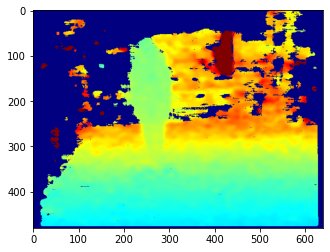

In [297]:
# del filtered
bag_file = '/home/zmh/hdd/Projects/Group-A/Depth_Map/dataset/realsense_jp/lady1.bag'

pipeline =rs.pipeline()
config = rs.config()
rs.config.enable_device_from_file(config, bag_file, False) 
pipeline.start(config)
align = rs.align(rs.stream.color)
frameset = pipeline.wait_for_frames()
###
frameset = align.process(frameset)
filtered = frameset.get_depth_frame()
depth = filtered
color_frame = frameset.get_color_frame()
filtered = dec_filter.process(filtered)
filtered = spa_filter.process(filtered)
filtered = temp_filter.process(filtered)
filtered = fill_filter.process(filtered)

depth = np.asanyarray(depth.get_data())
cv2_color = to_color(depth)
filled = np.asanyarray(filtered.get_data())
fill_colormap = to_color(filled)
color_image = np.asanyarray(color_frame.get_data())

show(fill_colormap, mode= 'cv2')
show(cv2_color , mode = 'plt')

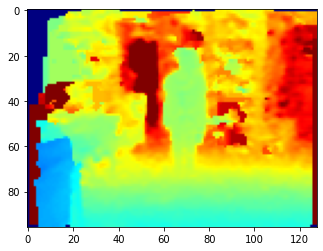

In [176]:
color = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.0355), cv2.COLORMAP_JET)[:,:,::-1]  
show(color , mode = 'plt')

In [ ]:
print('Saving Frame: ', i)
frameset = pipeline.wait_for_frames()

frameset = align.process(frameset)

depth_frame = frameset.get_depth_frame()
frame = depth_frame
frame = dec_filter.process(frame)
frame = depth_to_disparity.process(frame)
frame = spa_filter.process(frame)
frame = temp_filter.process(frame)
frame = disparity_to_depth.process(frame)
frame = fill_filter.process(frame)
depth_fill = np.asanyarray(frame.get_data())
no_fill_colormap = np.asanyarray(colorizer.colorize(depth_frame).get_data())
fill_colormap = np.asanyarray(colorizer.colorize(frame).get_data())

color_frame = frameset.get_color_frame()
color_image = np.asanyarray(color_frame.get_data())